# 1.3.6: World Population: Projecting Growth

<br>

---

*Modeling and Simulation in Python*

Copyright 2021 Allen Downey, (License: [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-nc-sa/4.0/))

Revised, Mike Augspurger (2021-present)

<br>

---


In [ ]:
# @title
# Import Pandas and give it the shorthand name "pd"
import pandas as pd

# Define the file we want to import
address = 'https://github.com/MAugspurger/ModSimPy_MAugs/raw/main/'
file_loc = 'Images_and_Data/Data/World_pop_data.xlsx'

# Import the world population data
data = pd.read_excel(address + file_loc, header=0,index_col=0)
census = data.US_census
un = data.UN

def run_simulation(system, change_func):
    results = pd.Series([],dtype=object)
    results[system['t_0']] = system['p_0']

    for t in range(system['t_0'], system['t_end']):
        growth = change_func(t, results[t], system)
        results[t+1] = results[t] + growth

    return results

def change_func_quad_rk(t, pop, system):
    growth = (system['r']*pop)*(1.0 - (pop/system['K']))
    return growth

---

## Examining Future Growth

### Generating a projection

Let's run the quadratic model, extending the results until 2100, and see how our projections compare to the professionals'.   We'll change `t_end` to 2100, and rerun our simulation using the quadratic change function and the same `r` and `K` values:

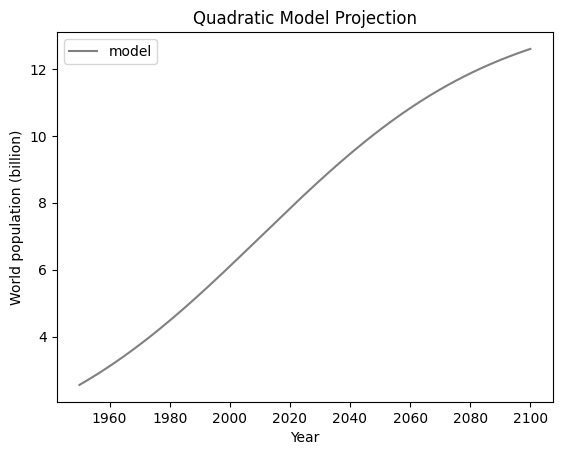

In [ ]:
# Pack parameters and independent variables into system object
t_0 = census.index[0]
p_0 = census[t_0]
t_end = 2100
r = 25 / 1000
K = 13.9
system = dict(t_0=t_0, p_0=p_0, t_end=t_end,
              r=r, K=K)

results = run_simulation(system, change_func_quad_rk)
results.plot(color='gray', label='model',xlabel='Year',
         ylabel='World population (billion)',
         title='Quadratic Model Projection',
            legend=True);

According to the model, population growth will slow gradually after 2020, approaching 12.6 billion by 2100.  Notice that even in this amount of time, the population never gets close to our projected carrying capacity of 13.8 billion.

### Projections vs. Predictions

<br>

We are using the word "projection" deliberately, rather than
"prediction":  

- "Prediction" implies "this is what we should reasonably expect to happen, at
least approximately"
- "projection" implies "if this
model is a good description of what is happening in this
system, and if nothing in the future causes the system parameters to change, this is what would happen."

<br>

So you can see that "projection" is a more careful word, with a stronger sense of a model's limitations.

<br>

<center>
<img src = https://github.com/MAugspurger/ModSimPy_MAugs/raw/main/Images_and_Data/Images/1_3/shananigans.PNG width = 400>
</center>

 <br>

Using "projection" leaves open the possibility that there are important things in the real world that are not captured in the model. It also suggests that, even if the model is good, the parameters we estimate based on the past might be different in the future.

<br>

The quadratic model we've been working with is based on the assumption
that population growth is limited by the availability of resources; in
that scenario, as the population approaches carrying capacity, birth
rates fall and death rates rise because resources become scarce.  If that assumption is valid, we might be able to use actual population
growth to estimate carrying capacity, provided we observe the
transition into the population range where the growth rate starts to fall.

But in the case of world population growth, those conditions don't
apply. Over the last 50 years, the net growth rate has leveled off, but not yet started to fall, so we don't have enough data to make a credible estimate of carrying capacity. And resource limitations are probably *not* the primary reason growth has slowed. As evidence, consider:

-   First, the death rate is not increasing; rather, it has declined
    from 1.9% in 1950 to 0.8% now.
    So the decrease in net growth is due entirely to declining birth
    rates.

-   Second, the relationship between resources and birth rate is the
    opposite of what the model assumes.  As nations develop and people
    become more wealthy, birth rates tend to fall: in other words, as resources have become *more available* to a community, the birth rate has tended to fall.

For these reasons, we should not take too seriously the idea that this model can estimate
carrying capacity.  Doubts such as these, and the fact that the globe is a very complex system, should lead us to be very careful in projecting the future behavior of the system.

<br>

But the predictions of a model can be credible even
if the assumptions of the model are not strictly true. For example,
population growth might behave *as if* it is resource limited, even if
the actual mechanism is something else.  In fact, demographers who study population growth often use models
similar to ours. In the next section, we'll compare our projections to
theirs.

### Comparing Projections

Let's compare our projections for population growth over the next 50-100 years to projections generated by the U.S. Census and the United Nations:

In [ ]:
# Import the world population data
address = 'https://github.com/MAugspurger/ModSimPy_MAugs/raw/main/'
file_loc = 'Images_and_Data/Data/World_pop_proj.xlsx'
data = pd.read_excel(address + file_loc, header=0,index_col=0)
census_proj = data.US_Census
un_proj = data.UN

Now we'll plot each of these projections along with our model:

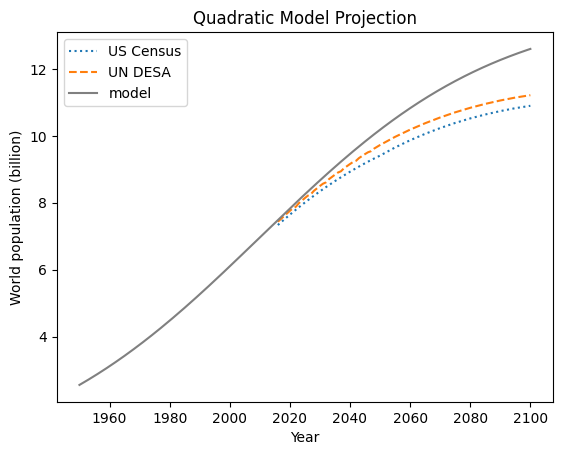

In [ ]:
system['r'] = 25/1000
system['K'] = 13.9
results = run_simulation(system, change_func_quad_rk)

census_proj.plot(style=':', label='US Census',legend=True)
un_proj.plot(style='--', label='UN DESA',xlabel='Year',
             ylabel='World population (billion)',legend=True)
results.plot(color='gray', label='model',xlabel='Year',
         ylabel='World population (billion)',
         title='Quadratic Model Projection',
            legend=True);

The U.N. DESA expects the world population to reach 11 billion around 2100, and then level off.
Projections by U.S. Census are a little lower.  Real demographers expect world population to grow more slowly than our model.

<br>

Nevertheless, their projections are qualitatively similar to ours, and
theirs differ from each other almost as much as they differ from ours.
So the results from our model, simple as it is, are not entirely unreasonable.

---

<br>

🟨 🟨 Active Reading: Quantitative

In [ ]:
import pandas as pd
from urllib.request import urlretrieve

location = 'https://github.com/MAugspurger/ModSimPy_MAugs/raw/main/'
folder = 'Support_files/'
name = 'Embedded_Qs.ipynb'
local, _ = urlretrieve(location + folder + name, name)
%run /content/$name

#@title {form-width: "50%", display-mode: "form" }
home = 'https://github.com/MAugspurger/ModSimPy_MAugs/raw/main/Images_and_Data/Embedded_Qs/'
data = display_Quant('1_3_world_pop',home,10)
answer = None #@param {type:"number"}
check_Quant(data,answer)

What appears to be carry capacity for world population, based on the US and UN data?  Adjust our parameters to better match their data to find an answer.

